## Narrowband Visualizations

In [2]:
from torchsig.datasets.modulations import ModulationsDataset
from torchsig.utils.dataset import SignalDataset
from torchsig.utils.visualize import *
from torchsig.datasets import conf
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

## Create the Dataset

In [3]:
config = conf.Sig53ImpairedTrainQAConfig

dataset = ModulationsDataset(
    classes=ModulationsDataset.default_classes,
    use_class_idx=config.use_class_idx,
    level=config.level,
    num_iq_samples=config.num_iq_samples,
    num_samples=config.num_samples,
    include_snr=config.include_snr,
)

In [4]:
class DataWrapper(SignalDataset):
    def __init__(self, dataset):
        super().__init__(dataset)
        self.dataset = dataset

    def __getitem__(self, idx):
        x, (y, _) = self.dataset[idx]
        return x, y

    def __len__(self) -> int:
        return len(self.dataset)

In [5]:
plot_dataset = DataWrapper(dataset)

## Visualizer Parameters

In [6]:
samples_per_plot = 16

# Visualizations

In [7]:
data_loader = DataLoader(dataset=plot_dataset, batch_size=samples_per_plot, shuffle=True)

## IQ Visualizer

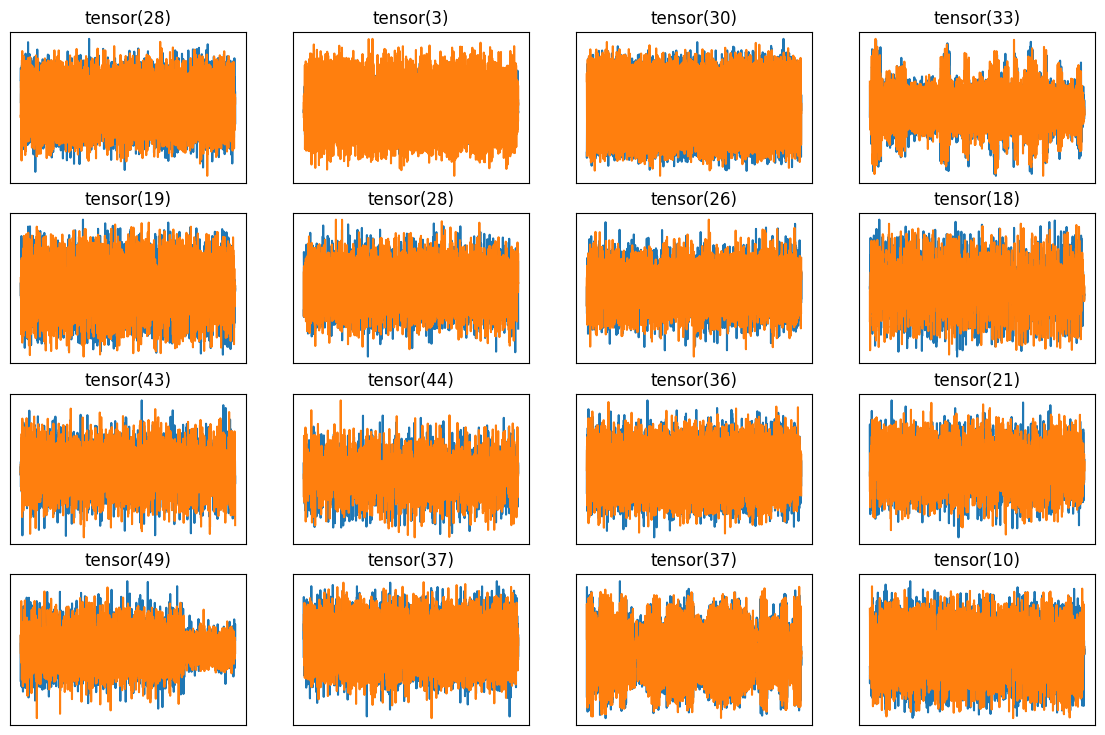

In [8]:
visualizer = IQVisualizer(
    data_loader=data_loader,
    visualize_transform=None,
    visualize_target_transform=None,
)

for figure in iter(visualizer):
    figure.set_size_inches(14, 9)
    plt.show()
    break

## Spectrogram Visualizer

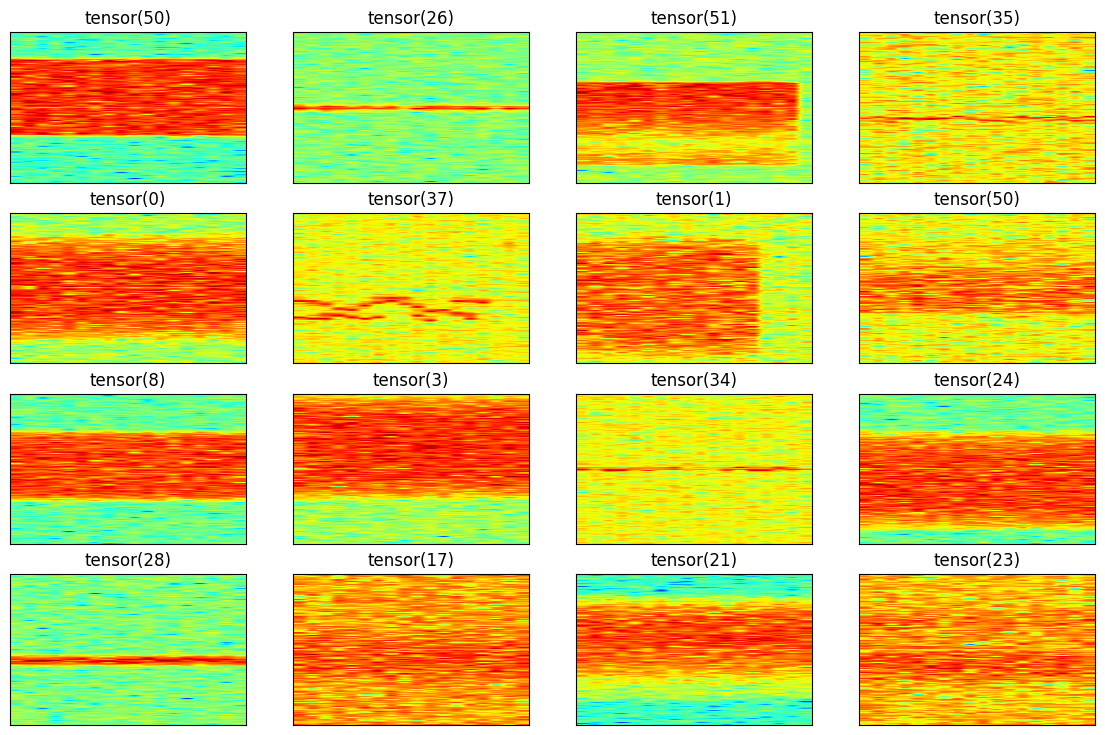

In [9]:
visualizer = SpectrogramVisualizer(
    data_loader=data_loader,
    visualize_transform=None,
    visualize_target_transform=None,
)

for figure in iter(visualizer):
    figure.set_size_inches(14, 9)
    plt.show()
    break

## Wavelet Visualizer

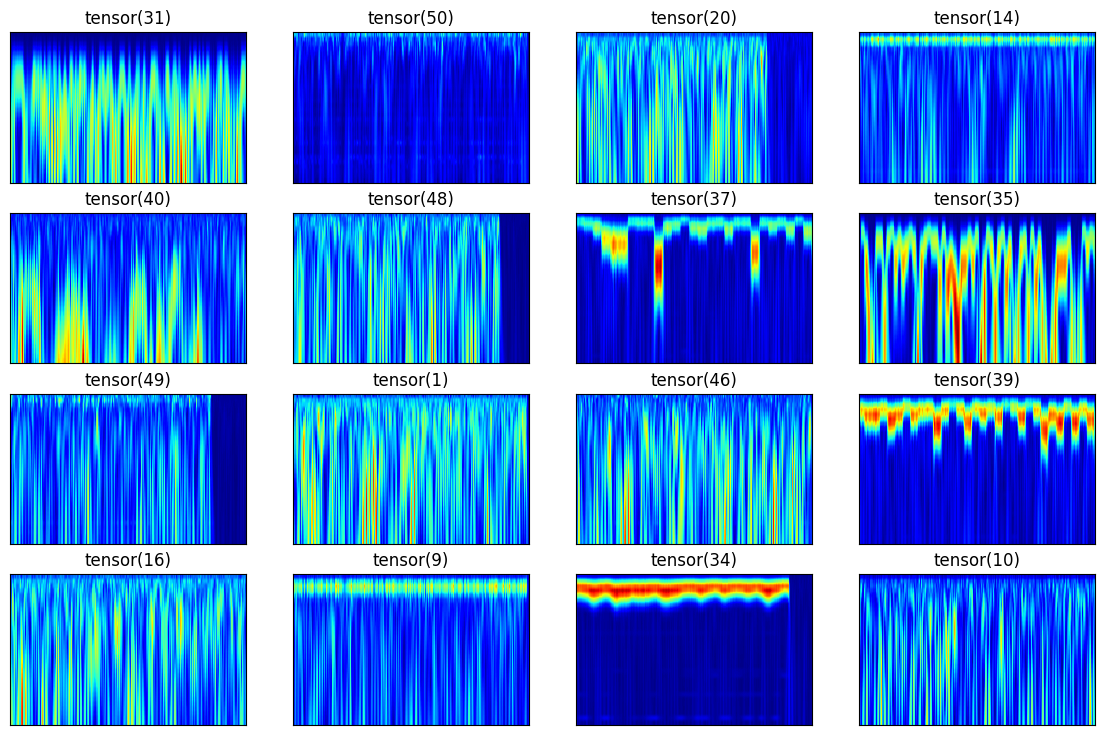

In [10]:
visualizer = WaveletVisualizer(
    data_loader=data_loader,
    visualize_transform=None,
    visualize_target_transform=None,
)

for figure in iter(visualizer):
    figure.set_size_inches(14, 9)
    plt.show()
    break

## Constellation Visualizer

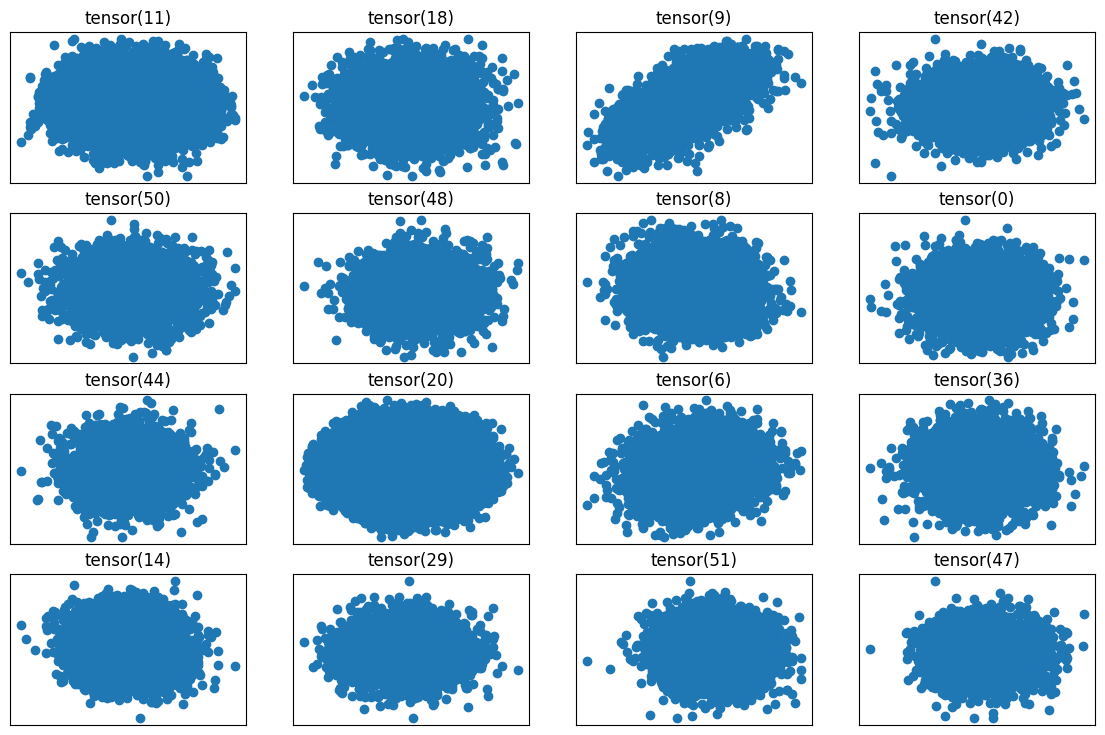

In [11]:
visualizer = ConstellationVisualizer(
    data_loader=data_loader,
    visualize_transform=None,
    visualize_target_transform=None,
)

for figure in iter(visualizer):
    figure.set_size_inches(14, 9)
    plt.show()
    break

## Time Series Visualizer

/home/gvanhoy/.virtual_envs/python38/lib/python3.8/site-packages/torch/_tensor.py:972: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


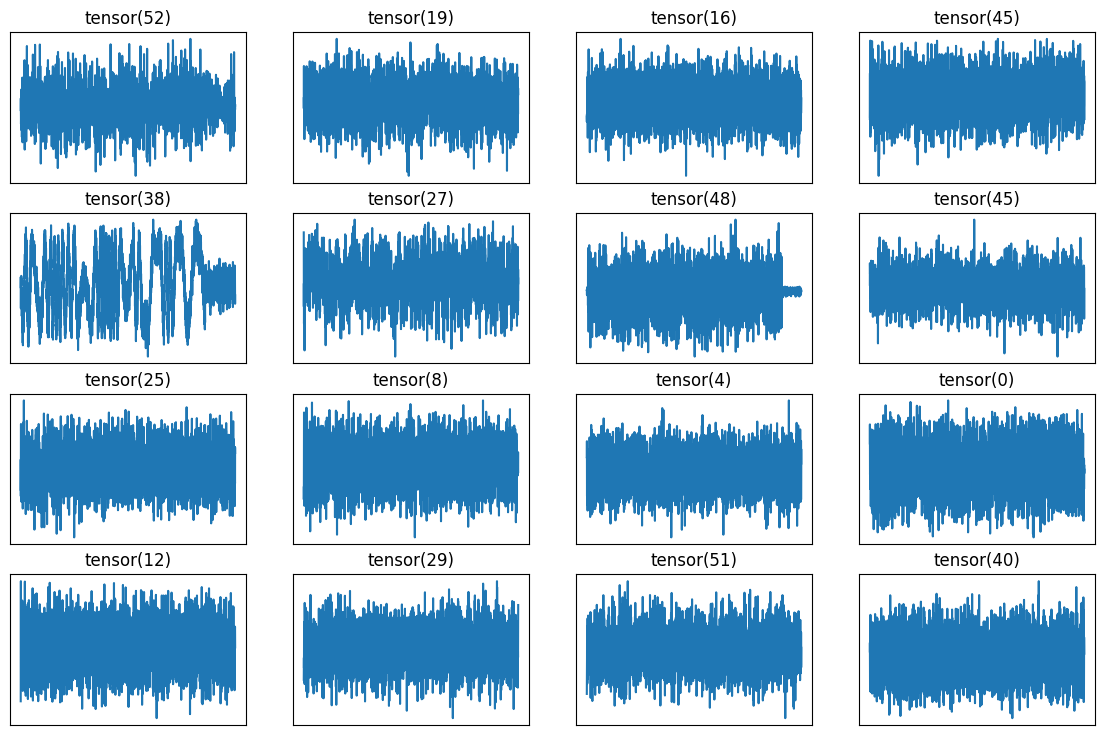

In [12]:
visualizer = TimeSeriesVisualizer(
    data_loader=data_loader,
    visualize_transform=None,
    visualize_target_transform=None,
)

for figure in iter(visualizer):
    figure.set_size_inches(14, 9)
    plt.show()
    break

## Image Visualizer
This transform interprets the input as an image.

In this case, we use a data transform (a function) to reshape the input to appear like an image.

This is actually a time-time raster plot when used like this.

In [15]:
def abs_and_reshape(data: np.ndarray) -> np.ndarray:
    data = np.abs(data)
    batch_size = data.shape[0]
    length = data.shape[1]
    return data.reshape(batch_size, int(np.sqrt(length)), -1)

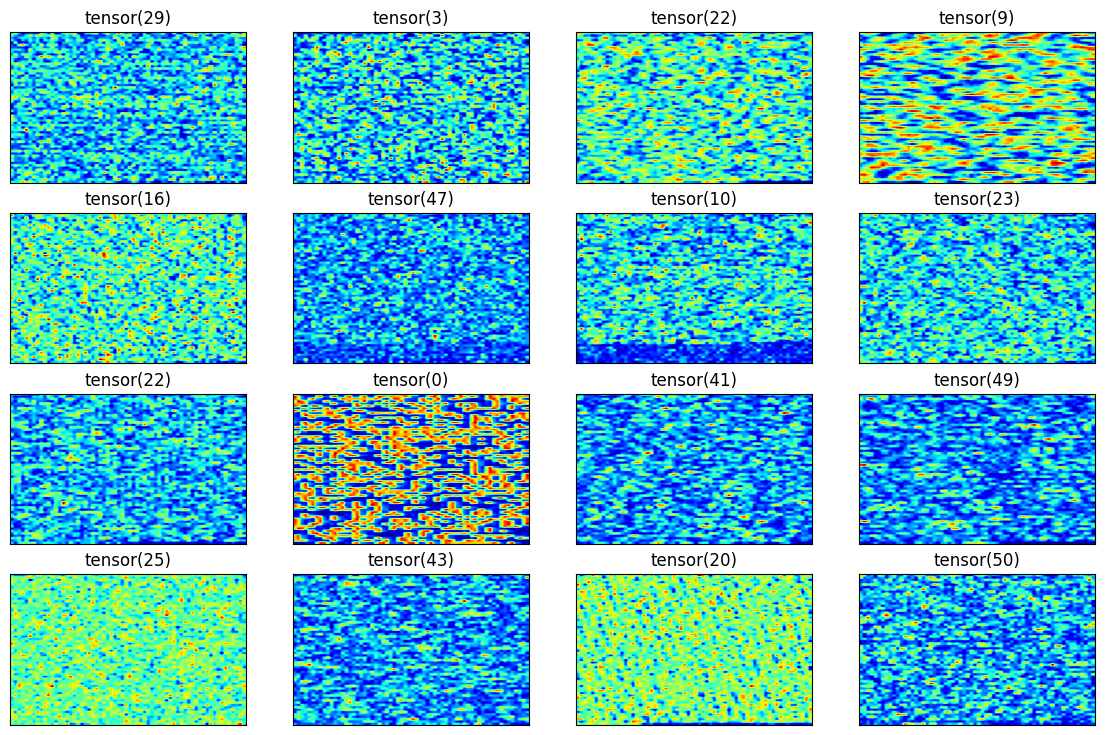

In [16]:
visualizer = ImageVisualizer(
    data_loader=data_loader,
    visualize_transform=abs_and_reshape,
    visualize_target_transform=None,
)

for figure in iter(visualizer):
    figure.set_size_inches(14, 9)
    plt.show()
    break

## PSD Visualizer

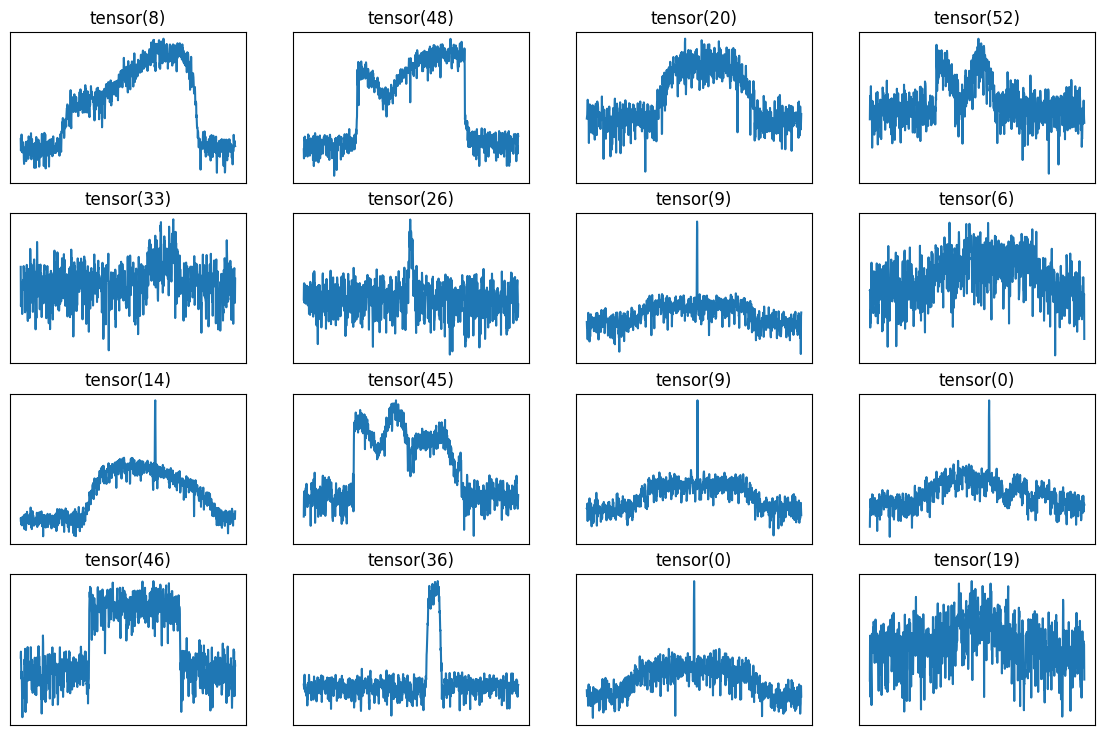

In [17]:
visualizer = PSDVisualizer(
    data_loader=data_loader,
    visualize_transform=None,
    visualize_target_transform=None,
)

for figure in iter(visualizer):
    figure.set_size_inches(14, 9)
    plt.show()
    break